In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

/kaggle/input/farm-crop-detection/2017-01-01/S2A_MSIL1C_20170101T082332_N0204_R121_T34JEP_20170101T084543.SAFE/manifest.safe
/kaggle/input/farm-crop-detection/2017-01-01/S2A_MSIL1C_20170101T082332_N0204_R121_T34JEP_20170101T084543.SAFE/MTD_MSIL1C.xml
/kaggle/input/farm-crop-detection/2017-01-01/S2A_MSIL1C_20170101T082332_N0204_R121_T34JEP_20170101T084543.SAFE/INSPIRE.xml
/kaggle/input/farm-crop-detection/2017-01-01/S2A_MSIL1C_20170101T082332_N0204_R121_T34JEP_20170101T084543.SAFE/DATASTRIP/DS_MTI__20170103T030708_S20170101T084543/MTD_DS.xml
/kaggle/input/farm-crop-detection/2017-01-01/S2A_MSIL1C_20170101T082332_N0204_R121_T34JEP_20170101T084543.SAFE/HTML/UserProduct_index.html
/kaggle/input/farm-crop-detection/2017-01-01/S2A_MSIL1C_20170101T082332_N0204_R121_T34JEP_20170101T084543.SAFE/HTML/banner_1.png
/kaggle/input/farm-crop-detection/2017-01-01/S2A_MSIL1C_20170101T082332_N0204_R121_T34JEP_20170101T084543.SAFE/HTML/banner_3.png
/kaggle/input/farm-crop-detection/2017-01-01/S2A_MSIL1C_

In [2]:
# 
# /kaggle/input/crop-detection-challenge-additional-data/OrangeRiver_Crop_Growth_Stages.docx
# /kaggle/input/crop-detection-challenge-additional-data/crop_id_list.csv
# /kaggle/input/crop-detection-challenge-additional-data/Farmpin_training.csv

### EDA and read data

In [3]:
sample_sub = pd.read_csv('/kaggle/input/crop-detection-challenge-additional-data/sample_submission_fixed.csv')
print(sample_sub.shape)
sample_sub.head()

(1074, 10)


,field_id,crop_id_1,crop_id_2,crop_id_3,crop_id_4,crop_id_5,crop_id_6,crop_id_7,crop_id_8,crop_id_9
0,5,0.00321,0.4321,0.677,0.1323,0.97,0.432,0.432,0.123,0.432
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
train = gpd.read_file('/kaggle/input/crop-detection-challenge-additional-data/train/train/train.shp')
train.head()

,Field_Id,Area,Subregion,Crop_Id_Ne,geometry
0,1,0.915905,3,8,POLYGON ((2467881.175041331 -3352032.059296422...
1,2,2.064410,3,6,"POLYGON ((2468428.90623293 -3351993.17305059, ..."
2,3,1.080300,3,8,POLYGON ((2468333.745293362 -3352058.485056543...
3,4,1.316190,3,8,POLYGON ((2468607.857733211 -3352012.337531495...
4,7,5.529220,3,8,"POLYGON ((2468646.08520868 -3351706.201920062,..."


In [5]:
train.shape

(2497, 5)

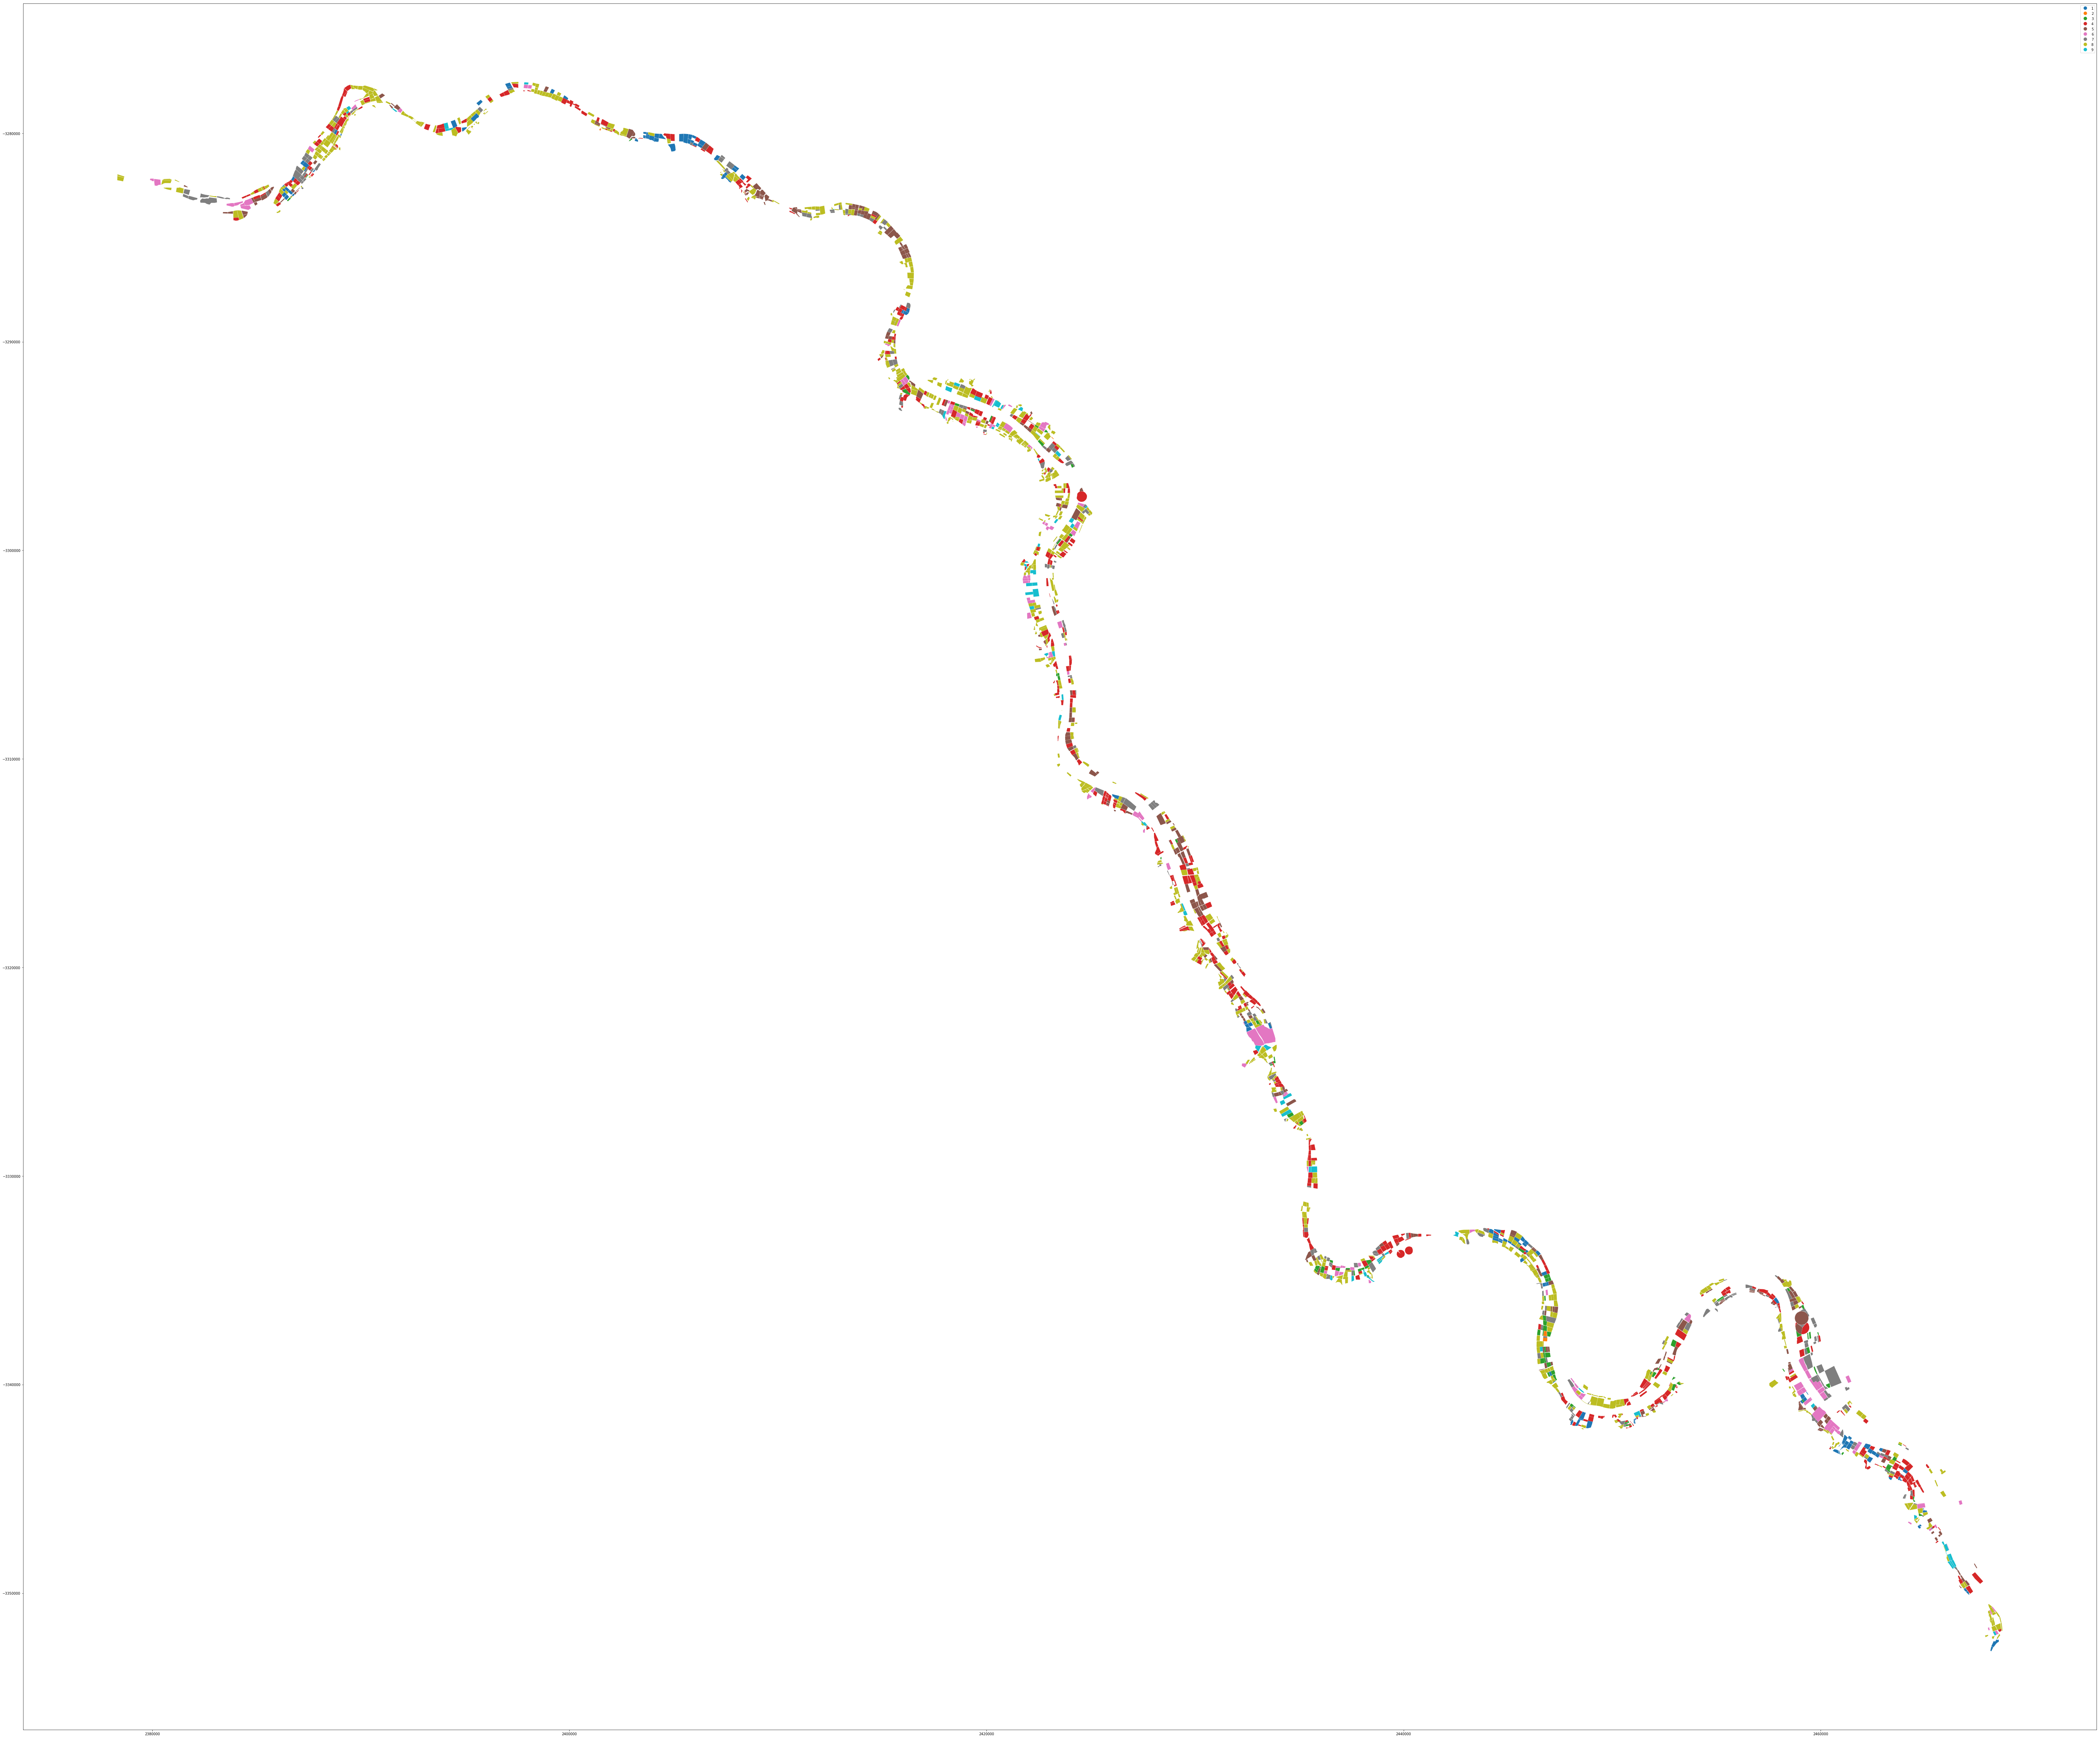

In [6]:
# http://geopandas.org/mapping.html
train.plot(column='Crop_Id_Ne', linewidth=2, figsize=(100,70), legend = True)
plt.tight_layout()

In [7]:
test = gpd.read_file('/kaggle/input/crop-detection-challenge-additional-data/test/test/test.shp')
test.head()

,Field_Id,Area,Subregion,geometry
0,5,1.322590,3,POLYGON ((2468454.792855258 -3351779.658448273...
1,6,0.955864,3,POLYGON ((2468670.690483304 -3351827.266046685...
2,10,11.509800,3,"POLYGON ((2468365.44901751 -3351541.136415984,..."
3,18,2.697520,3,POLYGON ((2437080.101649587 -3334938.835198846...
4,23,4.238030,3,POLYGON ((2437320.480601263 -3334595.737163622...


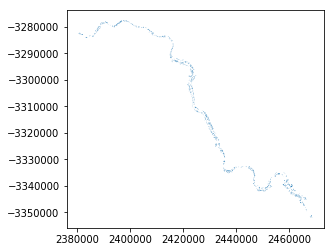

In [8]:
test.plot()

In [9]:
test.shape

(1074, 4)

In [10]:
train['Crop_Id_Ne'].value_counts()

8    943
4    536
5    283
7    267
6    147
1    142
3     95
9     77
2      7
Name: Crop_Id_Ne, dtype: int64

In [11]:
train.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2497 entries, 0 to 2496
Data columns (total 5 columns):
Field_Id      2497 non-null int64
Area          2497 non-null float64
Subregion     2497 non-null int64
Crop_Id_Ne    2497 non-null object
geometry      2494 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 97.7+ KB


There are some null entries in the geometry column that we have to remove be able to apply some operations.`

In [12]:
train = train.dropna(subset = ['geometry'])
train.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2494 entries, 0 to 2496
Data columns (total 5 columns):
Field_Id      2494 non-null int64
Area          2494 non-null float64
Subregion     2494 non-null int64
Crop_Id_Ne    2494 non-null object
geometry      2494 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 116.9+ KB


In [13]:
test.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 4 columns):
Field_Id     1074 non-null int64
Area         1074 non-null float64
Subregion    1074 non-null int64
geometry     1074 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 33.7+ KB


Ok no non entries here

### Build first model

This model will be based on the distances between the crops, So the probability of having a crop depends on the distance of that polygon from the closest of its type.

There are two types:
- The first type will be based only on the closest distance from a crop with a specific type. So for example, lets say we want to classify a polygon, we mesure the distance from other centroids and we calculate the distance from each crop type and then calculate the probabilty witch will be proportional to the distance.

- The second method will be to mesure the sum of the distances from each type and do the same work as before, the second one seems more reliable.

#### First type of model

In [14]:
train_copy = train.copy()
train_copy['centroid'] = train_copy['geometry'].centroid
train_copy['area'] = train_copy['geometry'].area
train_copy.head()

,Field_Id,Area,Subregion,Crop_Id_Ne,geometry,centroid,area
0,1,0.915905,3,8,POLYGON ((2467881.175041331 -3352032.059296422...,POINT (2467953.698374246 -3352050.598045756),9159.053859
1,2,2.064410,3,6,"POLYGON ((2468428.90623293 -3351993.17305059, ...",POINT (2468439.835487478 -3351890.014429016),20644.052237
2,3,1.080300,3,8,POLYGON ((2468333.745293362 -3352058.485056543...,POINT (2468268.576524977 -3352121.702060645),10803.041117
3,4,1.316190,3,8,POLYGON ((2468607.857733211 -3352012.337531495...,POINT (2468525.055554296 -3352077.722638885),13161.880472
4,7,5.529220,3,8,"POLYGON ((2468646.08520868 -3351706.201920062,...",POINT (2468528.235891099 -3351606.08503303),55292.169276


In [15]:
train_copy.groupby(['Crop_Id_Ne']).describe()

Field_Id                                                     \
              count         mean          std     min      25%     50%   
Crop_Id_Ne                                                               
1             142.0  1849.281690   863.493986    17.0  1490.50  1746.5   
2               7.0  1939.571429   460.679519  1375.0  1584.00  1887.0   
3              95.0  1111.642105   781.440622    26.0   389.50  1212.0   
4             536.0  1706.764925   975.689046    27.0   830.75  1746.0   
5             283.0  1752.915194  1038.105968    25.0   718.50  1788.0   
6             146.0  3476.452055   302.866081     2.0  3452.25  3501.5   
7             267.0  1657.146067  1067.386407    14.0   529.00  1641.0   
8             941.0  1776.871413   976.671994     1.0   964.00  1813.0   
9              77.0  1434.974026   844.692656    15.0   743.00  1461.0   

                              Area            ... Subregion        area  \
                75%     max  count      mean  ...       75%  max  count   
Crop_Id_Ne                                    ...                         
1           2504.75  3288.0  142.0  2.399337  ...       6.0  6.0  142.0   
2           2312.50  2522.0    7.0  1.171296  ...       6.0  6.0    7.0   
3           1448.50  3241.0   95.0  2.069198  ...       3.0  6.0   95.0   
4           2496.75  3396.0  536.0  2.540949  ...       5.0  7.0  536.0   
5           2752.50  3388.0  283.0  2.706123  ...       5.0  7.0  283.0   
6           3560.50  3603.0  146.0  3.695255  ...       5.0  7.0  146.0   
7           2665.50  3338.0  267.0  2.625189  ...       5.0  7.0  267.0   
8           2637.00  3383.0  941.0  2.195529  ...       5.0  7.0  941.0   
9           2144.00  3316.0   77.0  2.781241  ...       4.0  6.0   77.0   

                                                                   \
                    mean           std          min           25%   
Crop_Id_Ne                                                          
1           23993.367872  18625.511126  1334.508283   9866.798395   
2           11712.959053  16471.514736   224.112555    842.355885   
3           20691.980235  13373.461613  3602.513588   9875.583383   
4           25409.490519  21396.210160   435.492801  10783.118757   
5           27061.234496  29626.506199  1227.137241  10633.250224   
6           36952.548542  57834.428688  1311.696172  12973.531777   
7           26251.887699  36348.948820  1666.585901  10296.478655   
8           21955.290790  17963.912165   379.999351   9117.513755   
9           27812.400607  18996.072636  1577.932369  15559.176812   

                                                       
                     50%           75%            max  
Crop_Id_Ne                                             
1           21345.526158  33016.338137   89568.602998  
2            3515.017311  19565.887192   37435.097350  
3           16649.632418  29294.411025   64437.371284  
4           21199.679786  32702.781046  193420.712895  
5           19333.514807  33310.741515  336310.430880  
6           22386.312242  42070.637446  527231.206750  
7           18142.127872  30621.950581  452159.484635  
8           17960.671003  29296.130057  120000.373219  
9           22281.135583  37053.289927   95668.556325  

[9 rows x 32 columns]

In [16]:
test_copy = test.copy()
test_copy['centroid'] = test_copy['geometry'].centroid
test_copy['area'] = test_copy['geometry'].area
test_copy.head()

,Field_Id,Area,Subregion,geometry,centroid,area
0,5,1.322590,3,POLYGON ((2468454.792855258 -3351779.658448273...,POINT (2468550.418312602 -3351890.89846504),13225.905681
1,6,0.955864,3,POLYGON ((2468670.690483304 -3351827.266046685...,POINT (2468650.721676179 -3351900.721698691),9558.642413
2,10,11.509800,3,"POLYGON ((2468365.44901751 -3351541.136415984,...",POINT (2468432.532148114 -3351265.903470529),115098.381892
3,18,2.697520,3,POLYGON ((2437080.101649587 -3334938.835198846...,POINT (2437136.450307097 -3335076.089344672),26975.222824
4,23,4.238030,3,POLYGON ((2437320.480601263 -3334595.737163622...,POINT (2437404.373351772 -3334719.87932505),42380.283164


In [17]:
import math
from tqdm import tqdm

# test_copy = test_copy.head(1000)
# train_copy = train_copy.head(1000)

### Polygon intersection

In [18]:
from queue import PriorityQueue
def polygon_intersection(row):
    global train_count
#     print('Crop_Id_Ne ', row['Crop_Id_Ne'])
    poly1 = row['geometry']
    count = 0
    counted = False
    for index, row2 in train_copy.iterrows():
        poly2 = row2['geometry']
        if(poly1.intersects(poly2) and row['Field_Id'] != row2['Field_Id']):
            count +=1
            if(not counted and row['Crop_Id_Ne'] == row2['Crop_Id_Ne']):
                train_count +=1
                counted = True
#             print('The polygon that intersects with has crop id ', row2['Crop_Id_Ne'])
#     print('count ', count)   

In [19]:
train_count = 0
# train_fe = train_copy.apply(lambda row: polygon_intersection(row), axis = 1)
print(train_count)

0


In [20]:
print(train_count)

0


We can observe that we can't build a robust model based on the intersection between the polygons.

### K nearest neighbor

In [21]:
k = 10
# train_fe = train_copy.apply(lambda row: k_nearest_neighbor(row, k), axis = 1)

### Dumb models

In [22]:
train['Crop_Id_Ne'].value_counts()

8    941
4    536
5    283
7    267
6    146
1    142
3     95
9     77
2      7
Name: Crop_Id_Ne, dtype: int64

In [23]:
length = train.shape[0]
print(length)
idx = train['Crop_Id_Ne'].value_counts().index.values
for i in range(9):
    col_num = int(idx[i])
    print(col_num)
    occ = int(train['Crop_Id_Ne'].value_counts()[i])
    print(occ, '   ' , occ/length)
    sample_sub.iloc[:,col_num] = occ/length
sample_sub.head()

2494
8
941     0.3773055332798717
4
536     0.214915797914996
5
283     0.11347233360064155
7
267     0.1070569366479551
6
146     0.05854049719326383
1
142     0.05693664795509222
3
95     0.03809141940657578
9
77     0.030874097834803528
2
7     0.0028067361668003207


,field_id,crop_id_1,crop_id_2,crop_id_3,crop_id_4,crop_id_5,crop_id_6,crop_id_7,crop_id_8,crop_id_9
0,5,0.056937,0.002807,0.038091,0.214916,0.113472,0.05854,0.107057,0.377306,0.030874
1,6,0.056937,0.002807,0.038091,0.214916,0.113472,0.05854,0.107057,0.377306,0.030874
2,10,0.056937,0.002807,0.038091,0.214916,0.113472,0.05854,0.107057,0.377306,0.030874
3,18,0.056937,0.002807,0.038091,0.214916,0.113472,0.05854,0.107057,0.377306,0.030874
4,23,0.056937,0.002807,0.038091,0.214916,0.113472,0.05854,0.107057,0.377306,0.030874


In [24]:
sample_sub.head()
columns = [col for col in sample_sub.columns.values if col !='field_id']
print(columns)
sample_sub[columns] = 0
# sample_sub['crop_id_2'] = 1
sample_sub.head(10)

['crop_id_1', 'crop_id_2', 'crop_id_3', 'crop_id_4', 'crop_id_5', 'crop_id_6', 'crop_id_7', 'crop_id_8', 'crop_id_9']


,field_id,crop_id_1,crop_id_2,crop_id_3,crop_id_4,crop_id_5,crop_id_6,crop_id_7,crop_id_8,crop_id_9
0,5,0,0,0,0,0,0,0,0,0
1,6,0,0,0,0,0,0,0,0,0
2,10,0,0,0,0,0,0,0,0,0
3,18,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0
5,28,0,0,0,0,0,0,0,0,0
6,32,0,0,0,0,0,0,0,0,0
7,35,0,0,0,0,0,0,0,0,0
8,43,0,0,0,0,0,0,0,0,0
9,44,0,0,0,0,0,0,0,0,0


In [25]:
sample_sub.to_csv('all_zeros.csv', index=False)

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 